In [1]:
# 📝 Building N-gram Models From Scratch on the Hindi Corpus

# Step 1: Install and Import Necessary Libraries
!pip install datasets -q
!pip install tqdm -q

import datasets
import re
from collections import Counter
from tqdm.auto import tqdm

# Step 2: Define the "From Scratch" N-gram Generator
def generate_ngrams_from_scratch(tokens, n):
    """
    Generates a list of n-grams from a list of tokens.
    """
    return [tuple(tokens[i : i + n]) for i in range(len(tokens) - n + 1)]

# Step 3: Load and Stream the Dataset
print("Loading Hindi dataset from IndicCorpV2...")
dataset = datasets.load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", streaming=True, split="hin_Deva")
print("Dataset loaded successfully.")

# We will process the first 1,000,000 sentences.
subset_size = 1_000_000
data_iterator = dataset.take(subset_size)

# Step 4: Define Text Preprocessing
def preprocess_hindi_text(text):
    """
    Cleans and tokenizes Hindi text.
    - Removes non-Devanagari characters (except numbers and basic punctuation).
    - Adds sentence start/end markers.
    """
    # Keep only Devanagari characters, digits, spaces, and sentence punctuation
    text = re.sub(r'[^\u0900-\u097F\s\d\.\?!]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    return ["<s>"] + tokens + ["</s>"]

# Step 5: Build N-gram Models using the "From Scratch" function
unigram_counts = Counter()
bigram_counts = Counter()
trigram_counts = Counter()
quadrigram_counts = Counter()
total_tokens = 0
vocab = set()

print(f"\nProcessing {subset_size} sentences to build n-gram models from scratch...")

for item in tqdm(data_iterator, total=subset_size):
    text = item.get('text', None)
    if not text:
        continue

    tokens = preprocess_hindi_text(text)
    total_tokens += len(tokens)
    vocab.update(tokens)

    unigram_counts.update(generate_ngrams_from_scratch(tokens, 1))
    bigram_counts.update(generate_ngrams_from_scratch(tokens, 2))
    trigram_counts.update(generate_ngrams_from_scratch(tokens, 3))
    quadrigram_counts.update(generate_ngrams_from_scratch(tokens, 4))

# Step 6: Display the Results
print("\n✅ Finished processing!")
print(f"Vocabulary Size (V): {len(vocab)}")
print(f"Total Tokens Processed: {total_tokens}")
print(f"Unique Unigrams: {len(unigram_counts)}")
print(f"Unique Bigrams: {len(bigram_counts)}")
print(f"Unique Trigrams: {len(trigram_counts)}")
print(f"Unique Quadrigrams: {len(quadrigram_counts)}")

print("\n--- Top 5 Most Common N-grams (From Scratch) ---")
print("Unigrams:", unigram_counts.most_common(5))
print("Bigrams:", bigram_counts.most_common(5))
print("Trigrams:", trigram_counts.most_common(5))
print("Quadrigrams:", quadrigram_counts.most_common(5))

Loading Hindi dataset from IndicCorpV2...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset loaded successfully.

Processing 1000000 sentences to build n-gram models from scratch...



✅ Finished processing!
Vocabulary Size (V): 444618
Total Tokens Processed: 29536905
Unique Unigrams: 444618
Unique Bigrams: 5281911
Unique Trigrams: 15005130
Unique Quadrigrams: 22259737

--- Top 5 Most Common N-grams (From Scratch) ---
Unigrams: [(('के',), 1190131), (('में',), 911406), (('की',), 717533), (('को',), 558423), (('से',), 528490)]
Bigrams: [(('के', 'लिए'), 166303), (('है।', '</s>'), 85493), (('है', 'कि'), 83863), (('के', 'साथ'), 67912), (('कहा', 'कि'), 61506)]
Trigrams: [(('ने', 'कहा', 'कि'), 29286), (('ने', 'बताया', 'कि'), 23168), (('करने', 'के', 'लिए'), 18666), (('उन्होंने', 'कहा', 'कि'), 14533), (('के', 'बारे', 'में'), 12855)]
Quadrigrams: [(('का', 'कहना', 'है', 'कि'), 8390), (('किया', 'जा', 'रहा', 'है।'), 3846), (('जा', 'रहा', 'है', 'कि'), 3732), (('की', 'जा', 'रही', 'है।'), 3401), (('<s>', 'हिंदी', 'न्यूज़', 'उत्तर'), 3214)]


Loading Hindi dataset from IndicCorpV2...
Dataset loaded successfully.

Processing 100000 sentences to build n-gram models...



✅ Processing Finished
Vocabulary Size: 106769
Unique Unigrams: 106769
Unique Bigrams: 960409


/tmp/ipython-input-2397992254.py:125: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2397992254.py:125: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2397992254.py:125: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2397992254.py:125: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2397992254.py:125: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2397992254.py:125: UserWarning: Glyph 2319 (\N{DEVANAGARI LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2397992254.py:125: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


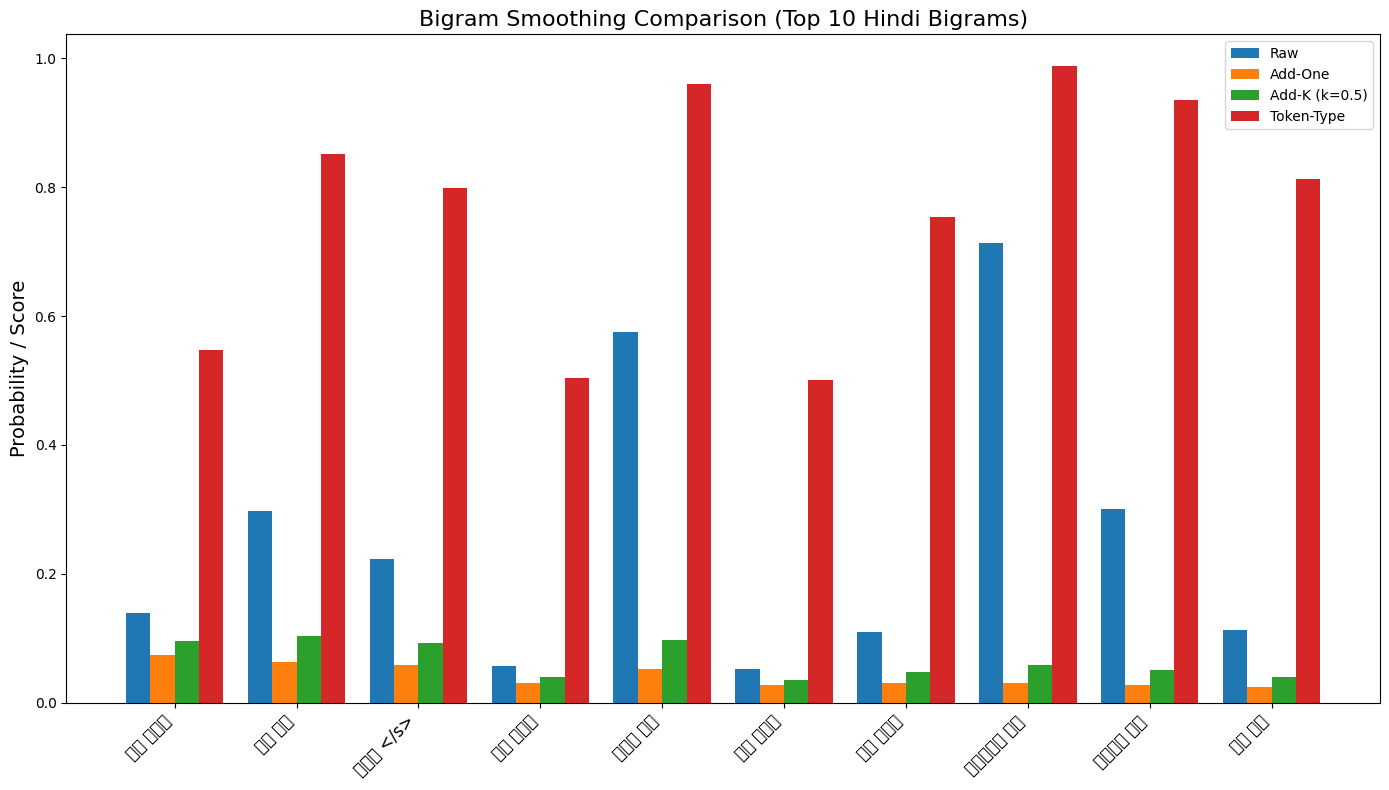

In [2]:
# 📝 Hindi N-gram Models with Smoothing Techniques

# Step 1: Install Libraries
!pip install datasets -q
!pip install tqdm -q
!pip install matplotlib -q

import datasets
import re
from collections import Counter
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Step 2: Define N-gram Generator
def generate_ngrams_from_scratch(tokens, n):
    return [tuple(tokens[i : i + n]) for i in range(len(tokens) - n + 1)]

# Step 3: Load Dataset (Streaming for Efficiency)
print("Loading Hindi dataset from IndicCorpV2...")
dataset = datasets.load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", streaming=True, split="hin_Deva")
print("Dataset loaded successfully.")

# Process a subset
subset_size = 100000   # Use 100k for demo; can increase to 1M on Colab Pro
data_iterator = dataset.take(subset_size)

# Step 4: Preprocessing
def preprocess_hindi_text(text):
    text = re.sub(r'[^\u0900-\u097F\s\d\.\?!]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    return ["<s>"] + tokens + ["</s>"]

# Step 5: Collect Counts
unigram_counts = Counter()
bigram_counts = Counter()
total_tokens = 0
vocab = set()

print(f"\nProcessing {subset_size} sentences to build n-gram models...")

for item in tqdm(data_iterator, total=subset_size):
    text = item.get("text", None)
    if not text:
        continue
    tokens = preprocess_hindi_text(text)
    total_tokens += len(tokens)
    vocab.update(tokens)
    unigram_counts.update(generate_ngrams_from_scratch(tokens, 1))
    bigram_counts.update(generate_ngrams_from_scratch(tokens, 2))

V = len(vocab)

print("\n✅ Processing Finished")
print(f"Vocabulary Size: {V}")
print(f"Unique Unigrams: {len(unigram_counts)}")
print(f"Unique Bigrams: {len(bigram_counts)}")

# ---------------------------------------------------
# Step 6: Smoothing Functions
# ---------------------------------------------------

def add_one_smoothing(bigram, unigram_counts, bigram_counts, V):
    """
    Laplace Smoothing: (count(bigram)+1) / (count(unigram of first word)+V)
    """
    w1, w2 = bigram
    return (bigram_counts[bigram] + 1) / (unigram_counts[(w1,)] + V)

def add_k_smoothing(bigram, unigram_counts, bigram_counts, V, k=0.5):
    """
    Add-K Smoothing: (count(bigram)+k) / (count(unigram of first word)+k*V)
    """
    w1, w2 = bigram
    return (bigram_counts[bigram] + k) / (unigram_counts[(w1,)] + k * V)

def add_token_type_smoothing(bigram, unigram_counts, bigram_counts, T):
    """
    Add-Token-Type Smoothing (custom):
    (count(bigram) + T) / (count(unigram of first word) + T)
    Note: may not be a probability distribution.
    """
    w1, w2 = bigram
    return (bigram_counts[bigram] + T) / (unigram_counts[(w1,)] + T)

# ---------------------------------------------------
# Step 7: Compare Raw vs Smoothed
# ---------------------------------------------------

# Take top 10 bigrams by raw count
top_bigrams = bigram_counts.most_common(10)
T = len(unigram_counts)  # token types

results = []
for bg, count in top_bigrams:
    w1, w2 = bg
    raw_prob = count / unigram_counts[(w1,)]
    laplace = add_one_smoothing(bg, unigram_counts, bigram_counts, V)
    addk = add_k_smoothing(bg, unigram_counts, bigram_counts, V, k=0.5)
    token_type = add_token_type_smoothing(bg, unigram_counts, bigram_counts, T)
    results.append((bg, raw_prob, laplace, addk, token_type))

# ---------------------------------------------------
# Step 8: Visualization
# ---------------------------------------------------

labels = [' '.join(bg) for bg, *_ in results]
raw_probs = [r[1] for r in results]
laplace_probs = [r[2] for r in results]
addk_probs = [r[3] for r in results]
tokentype_vals = [r[4] for r in results]

x = range(len(labels))
plt.figure(figsize=(14, 8))

plt.bar(x, raw_probs, width=0.2, label="Raw", align="center")
plt.bar([i+0.2 for i in x], laplace_probs, width=0.2, label="Add-One")
plt.bar([i+0.4 for i in x], addk_probs, width=0.2, label="Add-K (k=0.5)")
plt.bar([i+0.6 for i in x], tokentype_vals, width=0.2, label="Token-Type")

plt.xticks([i+0.3 for i in x], labels, rotation=45, ha="right", fontsize=12)
plt.ylabel("Probability / Score", fontsize=14)
plt.title("Bigram Smoothing Comparison (Top 10 Hindi Bigrams)", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

Loading Hindi dataset from IndicCorpV2...
Dataset loaded successfully.

Processing 100000 sentences for training...



✅ Training Finished
Vocabulary Size: 106769
Unique Unigrams: 106769
Unique Bigrams: 960409

✅ Sentence Probabilities on Hindi News Sentences:

                                                              Sentence  \
0  प्रधानमंत्री ने आज नई दिल्ली में जी20 शिखर सम्मेलन का उद्घाटन किया।   
1      भारत ने ऑस्ट्रेलिया को रोमांचक मुकाबले में पांच विकेट से हराया।   
2                       मुंबई में लगातार बारिश से जनजीवन प्रभावित हुआ।   
3                    सरकार ने नई शिक्षा नीति को लागू करने की घोषणा की।   
4             चंद्रयान-3 मिशन ने चांद पर सफलतापूर्वक सॉफ्ट लैंडिंग की।   
5              दिल्ली में प्रदूषण का स्तर खतरनाक स्तर पर पहुँच गया है।   
6                               वित्त मंत्री ने संसद में बजट पेश किया।   
7            देश में डिजिटल भुगतान के उपयोग में तेजी से वृद्धि हुई है।   
8                                कश्मीर में बर्फबारी से ठंड बढ़ गई है।   
9                                भारतीय टीम ने सीरीज जीतकर इतिहास रचा।   

            MLE       Add-One   Add-K (0.

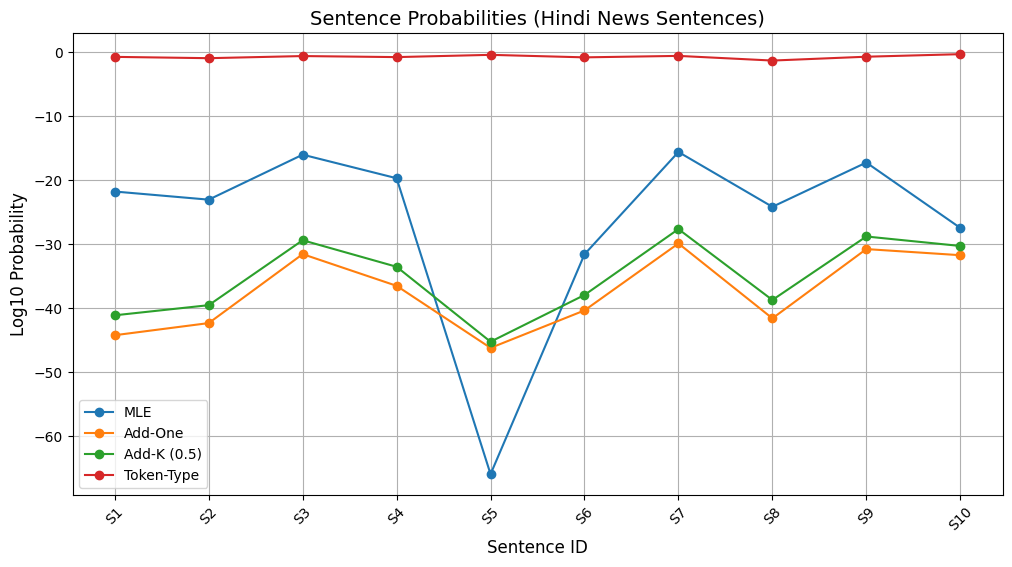

In [3]:
# 📝 Hindi N-gram Models on Real News Sentences

# Step 1: Install Libraries
!pip install datasets -q
!pip install tqdm -q
!pip install matplotlib -q

import datasets
import re
from collections import Counter
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Define N-gram Generator
def generate_ngrams_from_scratch(tokens, n):
    return [tuple(tokens[i : i + n]) for i in range(len(tokens) - n + 1)]

# Step 3: Load Dataset (for training)
print("Loading Hindi dataset from IndicCorpV2...")
dataset = datasets.load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", streaming=True, split="hin_Deva")
print("Dataset loaded successfully.")

# Training set: 100k sentences
train_size = 100000
train_data = dataset.take(train_size)

# Step 4: Preprocessing
def preprocess_hindi_text(text):
    text = re.sub(r'[^\u0900-\u097F\s\d\.\?!]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    return ["<s>"] + tokens + ["</s>"]

# Step 5: Collect Counts
unigram_counts = Counter()
bigram_counts = Counter()
vocab = set()

print(f"\nProcessing {train_size} sentences for training...")
for item in tqdm(train_data, total=train_size):
    text = item.get("text", None)
    if not text:
        continue
    tokens = preprocess_hindi_text(text)
    vocab.update(tokens)
    unigram_counts.update(generate_ngrams_from_scratch(tokens, 1))
    bigram_counts.update(generate_ngrams_from_scratch(tokens, 2))

V = len(vocab)
T = len(unigram_counts)  # token types

print("\n✅ Training Finished")
print(f"Vocabulary Size: {V}")
print(f"Unique Unigrams: {len(unigram_counts)}")
print(f"Unique Bigrams: {len(bigram_counts)}")

# ---------------------------------------------------
# Step 6: Smoothing Functions
# ---------------------------------------------------
def mle_bigram_prob(bigram):
    w1, w2 = bigram
    return bigram_counts[bigram] / unigram_counts[(w1,)] if unigram_counts[(w1,)] > 0 else 0

def add_one_prob(bigram):
    w1, w2 = bigram
    return (bigram_counts[bigram] + 1) / (unigram_counts[(w1,)] + V)

def add_k_prob(bigram, k=0.5):
    w1, w2 = bigram
    return (bigram_counts[bigram] + k) / (unigram_counts[(w1,)] + k*V)

def token_type_prob(bigram):
    w1, w2 = bigram
    return (bigram_counts[bigram] + T) / (unigram_counts[(w1,)] + T)

# ---------------------------------------------------
# Step 7: Sentence Probability Computation
# ---------------------------------------------------
def sentence_probability(tokens, method="mle", k=0.5):
    bigrams = generate_ngrams_from_scratch(tokens, 2)
    prob = 1.0
    for bg in bigrams:
        if method == "mle":
            p = mle_bigram_prob(bg)
        elif method == "add_one":
            p = add_one_prob(bg)
        elif method == "add_k":
            p = add_k_prob(bg, k)
        elif method == "token_type":
            p = token_type_prob(bg)
        else:
            raise ValueError("Unknown method")
        prob *= p if p > 0 else 1e-12  # avoid zero probability
    return prob

# ---------------------------------------------------
# Step 8: Use Hindi News Sentences
# (Replace/add more sentences from real articles as needed)
# ---------------------------------------------------
news_sentences = [
    "प्रधानमंत्री ने आज नई दिल्ली में जी20 शिखर सम्मेलन का उद्घाटन किया।",
    "भारत ने ऑस्ट्रेलिया को रोमांचक मुकाबले में पांच विकेट से हराया।",
    "मुंबई में लगातार बारिश से जनजीवन प्रभावित हुआ।",
    "सरकार ने नई शिक्षा नीति को लागू करने की घोषणा की।",
    "चंद्रयान-3 मिशन ने चांद पर सफलतापूर्वक सॉफ्ट लैंडिंग की।",
    "दिल्ली में प्रदूषण का स्तर खतरनाक स्तर पर पहुँच गया है।",
    "वित्त मंत्री ने संसद में बजट पेश किया।",
    "देश में डिजिटल भुगतान के उपयोग में तेजी से वृद्धि हुई है।",
    "कश्मीर में बर्फबारी से ठंड बढ़ गई है।",
    "भारतीय टीम ने सीरीज जीतकर इतिहास रचा।"
]

# Preprocess
processed_news = [preprocess_hindi_text(s) for s in news_sentences]

# ---------------------------------------------------
# Step 9: Compute Probabilities
# ---------------------------------------------------
results = []
for idx, tokens in enumerate(processed_news, 1):
    mle_p = sentence_probability(tokens, "mle")
    add1_p = sentence_probability(tokens, "add_one")
    addk_p = sentence_probability(tokens, "add_k", k=0.5)
    tokentype_p = sentence_probability(tokens, "token_type")
    results.append([news_sentences[idx-1], mle_p, add1_p, addk_p, tokentype_p])

df = pd.DataFrame(results, columns=["Sentence", "MLE", "Add-One", "Add-K (0.5)", "Token-Type"])
pd.set_option("display.max_colwidth", None)
print("\n✅ Sentence Probabilities on Hindi News Sentences:\n")
print(df)

# ---------------------------------------------------
# Step 10: Visualization
# ---------------------------------------------------
plt.figure(figsize=(12,6))
methods = ["MLE", "Add-One", "Add-K (0.5)", "Token-Type"]

for method in methods:
    plt.plot(range(1, len(df)+1), np.log10(df[method]), marker="o", label=method)

plt.xticks(range(1, len(df)+1), [f"S{i}" for i in range(1, len(df)+1)], rotation=45)
plt.xlabel("Sentence ID", fontsize=12)
plt.ylabel("Log10 Probability", fontsize=12)
plt.title("Sentence Probabilities (Hindi News Sentences)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import nbformat
import json
import sys

# Replace with the actual name of your downloaded notebook file
input_filename = "nlp_lab4.ipynb"
output_filename = "lab4_valid_notebook.ipynb"

try:
    # Read the notebook
    with open(input_filename, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, as_version=4)

    # Add or update notebook metadata (optional but good practice for GitHub)
    if 'metadata' not in notebook:
        notebook['metadata'] = {}
    # You can add more standard Jupyter metadata here if needed
    # notebook.metadata['kernelspec'] = { ... }
    # notebook.metadata['language_info'] = { ... }

    # Save the notebook with the correct format and metadata
    with open(output_filename, 'w', encoding='utf-8') as f:
        nbformat.write(notebook, f)

    print(f"Notebook '{input_filename}' processed successfully.")
    print(f"Saved formatted notebook as '{output_filename}'.")

except FileNotFoundError:
    print(f"Error: Input file '{input_filename}' not found.")
    print("Please make sure you have downloaded the notebook and updated 'input_filename' in the script.")
except Exception as e:
    print(f"An error occurred: {e}")

Notebook 'nlp_lab4.ipynb' processed successfully.
Saved formatted notebook as 'lab4_valid_notebook.ipynb'.
